In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255 , shear_range= 0.2 , zoom_range= 0.2, horizontal_flip=True)



In [66]:
import cv2
import os
#os.mkdir('C:\\SCDProject\\svmModel\\Pretraining\\grayscale')
#os.mkdir('C:\\SCDProject\\svmModel\\Pretraining\\grayscale\\mel')
#os.mkdir('C:\\SCDProject\\svmModel\\Pretraining\\grayscale\\benign')
for img in os.listdir('C:\\SCDProject\\svmModel\\Pretraining\\MEL'):
    imgs = cv2.imread(f"C:\\SCDProject\\svmModel\\Pretraining\\MEL\\{img}",0)

    cv2.imwrite(f"C:\\SCDProject\\svmModel\\Pretraining\\grayscale\\mel\\{img}",imgs)

for img in os.listdir('C:\\SCDProject\\svmModel\\Pretraining\\benign'):
    imgs = cv2.imread(f"C:\\SCDProject\\svmModel\\Pretraining\\benign\\{img}",0)
    cv2.imwrite(f"C:\\SCDProject\\svmModel\\Pretraining\\grayscale\\benign\\{img}",imgs)


In [68]:
training_set = train_datagen.flow_from_directory('C:\\SCDProject\\svmModel\\Pretraining\\grayscale', target_size=(64,64), batch_size=32 , class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('C:\\SCDProject\\svmModel\\Pretraining\\grayscale', target_size=(64,64), batch_size=32 , class_mode='binary')

Found 4882 images belonging to 2 classes.
Found 4882 images belonging to 2 classes.


In [20]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [69]:
cnn = tf.keras.models.Sequential()
# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())
# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [70]:
cnn.summary()
# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [ ]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 40)

Epoch 1/40
153/153 [==============================] - 52s 332ms/step - loss: 0.1842 - accuracy: 0.9222 - val_loss: 0.1930 - val_accuracy: 0.9263
Epoch 2/40
153/153 [==============================] - 52s 342ms/step - loss: 0.1632 - accuracy: 0.9263 - val_loss: 0.1569 - val_accuracy: 0.9263
Epoch 3/40
153/153 [==============================] - 49s 320ms/step - loss: 0.1599 - accuracy: 0.9263 - val_loss: 0.1572 - val_accuracy: 0.9263
Epoch 4/40
153/153 [==============================] - 52s 342ms/step - loss: 0.1539 - accuracy: 0.9263 - val_loss: 0.1516 - val_accuracy: 0.9263
Epoch 5/40
153/153 [==============================] - 53s 346ms/step - loss: 0.1532 - accuracy: 0.9263 - val_loss: 0.1643 - val_accuracy: 0.9263
Epoch 6/40
153/153 [==============================] - 57s 374ms/step - loss: 0.1531 - accuracy: 0.9263 - val_loss: 0.1534 - val_accuracy: 0.9263
Epoch 7/40
153/153 [==============================] - 50s 324ms/step - loss: 0.1518 - accuracy: 0.9263 - val_loss: 0.1512 - val_ac

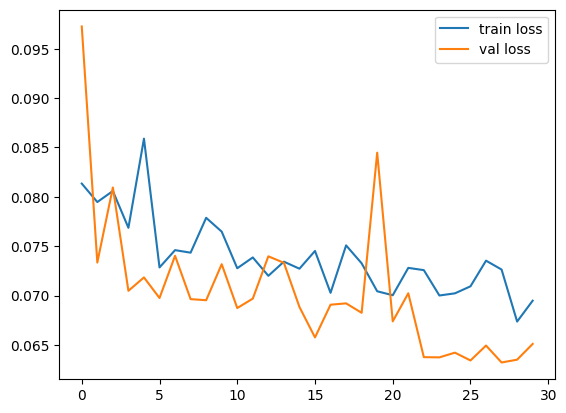

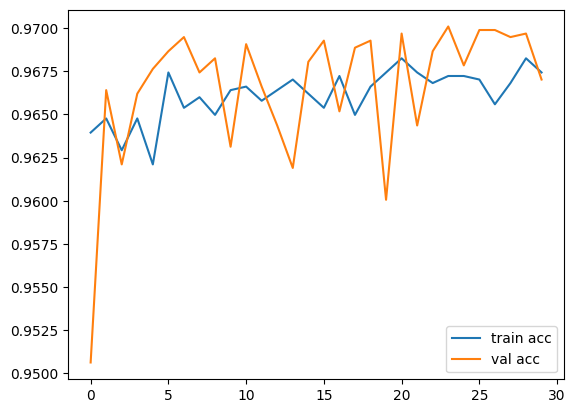

<Figure size 640x480 with 0 Axes>

In [52]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [53]:
from tensorflow.keras.models import load_model

cnn.save('model_mel_beg_30.h5')
from tensorflow.keras.models import load_model

# load model
model = load_model('model_mel_beg_30.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [56]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os
path = 'C:\SCDProject\svmModel\Pretraining\\MEL'
j = 0
pos = 0
neg = 0
for i in os.listdir(path):
    test_image = image.load_img(path+'\\'+i, target_size = (64,64))
    test_image = image.img_to_array(test_image)
    test_image=test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    print(result)
    if result<0:
        neg = neg+1
    else:
        pos = pos+1
    j = j+1
    if(j==300):
        break



1/1 [==============================] - 0s 45ms/step
[[-1.5882472]]
1/1 [==============================] - 0s 47ms/step
[[-7.3300505]]
1/1 [==============================] - 0s 62ms/step
[[-1.112352]]
1/1 [==============================] - 0s 40ms/step
[[-1.1580385]]
1/1 [==============================] - 0s 46ms/step
[[-1.1032023]]
1/1 [==============================] - 0s 42ms/step
[[-1.2255529]]
1/1 [==============================] - 0s 37ms/step
[[-1.6610566]]
1/1 [==============================] - 0s 39ms/step
[[-2.013016]]
1/1 [==============================] - 0s 41ms/step
[[-1.5411456]]
1/1 [==============================] - 0s 38ms/step
[[-3.9753668]]
1/1 [==============================] - 0s 35ms/step
[[-1.4230967]]
1/1 [==============================] - 0s 37ms/step
[[-1.6863207]]
1/1 [==============================] - 0s 38ms/step
[[-1.4558351]]
1/1 [==============================] - 0s 41ms/step
[[-1.6764793]]
1/1 [==============================] - 0s 46ms/step
[[-1.0601587

In [57]:
print(pos)

0


In [45]:
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [46]:
model = Sequential()

# [+] 1st convolutional layer
model.add(Conv2D(filters = 96,
                kernel_size = (11, 11),
                strides = (4, 4),
                activation = 'relu',
                input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))
model.add(Conv2D(filters = 256,
                kernel_size=(5, 5),
                strides=(1, 1),
                activation = 'relu',
                padding = "same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))
model.add(Conv2D(filters = 384,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 padding="same"))
model.add(BatchNormalization())

# [+] 4th convolutional layer
model.add(Conv2D(filters = 384,
                kernel_size = (1, 1),
                strides = (1, 1),
                activation = 'relu',
                padding = "same"))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256,
                kernel_size = (1, 1),
                strides = (1, 1),
                activation = 'relu',
                padding = "same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))

model.add(Flatten())  # [+] Convert the Conv2D objects into one List.

# [+] 6th, Dense layer:
# From the Docs:
# A Dense layer feeds all outputs from the previous layer to all its neurons,
# each neuron providing one output to the next layer.
# source: www.stackoverflow.com
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))

# [+] 7th Dense layer
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))

# [+] 8th output layer
model.add(Dense(2, activation = 'softmax'))

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 23, 23, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 11, 11, 96)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 256)      1024      
 hNormalization)                                                 
                                                      

In [50]:

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=model.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/hinge/mul/BroadcastGradientArgs' defined at (most recent call last):
    File "C:\Users\PRIOTOSH\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\PRIOTOSH\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\SCDProject\venv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\SCDProject\venv\lib\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "C:\SCDProject\venv\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\SCDProject\venv\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\PRIOTOSH\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\PRIOTOSH\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1899, in _run_once
      handle._run()
    File "C:\Users\PRIOTOSH\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\SCDProject\venv\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\SCDProject\venv\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\SCDProject\venv\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\SCDProject\venv\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\SCDProject\venv\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\SCDProject\venv\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\SCDProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "C:\SCDProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\SCDProject\venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\SCDProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\SCDProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\SCDProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\PRIOTOSH\AppData\Local\Temp\ipykernel_19800\445095576.py", line 5, in <module>
      r=model.fit(x = training_set, validation_data = test_set, epochs = 10)
    File "C:\SCDProject\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\SCDProject\venv\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\SCDProject\venv\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\SCDProject\venv\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\SCDProject\venv\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\SCDProject\venv\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\SCDProject\venv\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\SCDProject\venv\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "C:\SCDProject\venv\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/hinge/mul/BroadcastGradientArgs'
Incompatible shapes: [32,1] vs. [0,2]
	 [[{{node gradient_tape/hinge/mul/BroadcastGradientArgs}}]] [Op:__inference_train_function_137623]

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_mel_beg_deux.h5')
from tensorflow.keras.models import load_model

# load model
model = load_model('model_mel_beg_deux.h5')
model.summary()